In [1]:
import pandas as pd
import numpy as np

# Définir le nombre de patients à simuler
nombre_patients = 500

# Générer des données aléatoires pour les patients
np.random.seed(42)
age = np.random.randint(18, 90, size=nombre_patients)  # Âge des patients entre 18 et 90 ans
sexe = np.random.choice(['Homme', 'Femme'], size=nombre_patients)  # Sexe des patients
symptomes = np.random.choice(['Fièvre', 'Toux', 'Douleur', 'Fatigue', 'Nausée'], size=nombre_patients)

# Données avant l'utilisation de l'IA
precision_avant_ia = np.random.normal(70, 10, size=nombre_patients)  # Précision moyenne de 70% avec écart-type de 10
temps_diagnostic_avant_ia = np.random.normal(30, 5, size=nombre_patients)  # Temps moyen de 30 minutes
complications_avant_ia = np.random.normal(20, 5, size=nombre_patients)  # Taux de complications à 20%

# Données après l'utilisation de l'IA
precision_apres_ia = np.clip(precision_avant_ia + np.random.normal(10, 5, size=nombre_patients), 0, 100)
temps_diagnostic_apres_ia = np.clip(temps_diagnostic_avant_ia - np.random.normal(10, 3, size=nombre_patients), 5, None)
complications_apres_ia = np.clip(complications_avant_ia - np.random.normal(5, 2, size=nombre_patients), 0, 100)

# Créer un DataFrame pandas avec toutes les données
df = pd.DataFrame({
    'Age': age,
    'Sexe': sexe,
    'Symptômes': symptomes,
    'Précision Avant IA': precision_avant_ia,
    'Temps Diagnostic Avant IA': temps_diagnostic_avant_ia,
    'Complications Avant IA': complications_avant_ia,
    'Précision Après IA': precision_apres_ia,
    'Temps Diagnostic Après IA': temps_diagnostic_apres_ia,
    'Complications Après IA': complications_apres_ia
})

# Enregistrer les données simulées dans un fichier CSV
df.to_csv('donnees_sante_simulees.csv', index=False)

print('Données simulées enregistrées dans donnees_sante_simulees.csv')


Données simulées enregistrées dans donnees_sante_simulees.csv


In [3]:
import pandas as pd
df = pd.read_csv('donnees_sante_simulees.csv')
df.head()

,Age,Sexe,Symptômes,Précision Avant IA,Temps Diagnostic Avant IA,Complications Avant IA,Précision Après IA,Temps Diagnostic Après IA,Complications Après IA
0,69,Femme,Douleur,63.768595,24.149435,16.768863,79.068277,15.794241,12.807656
1,32,Femme,Fatigue,64.445229,20.990098,28.876554,77.530259,8.490096,24.558370
2,89,Homme,Nausée,63.626129,32.707314,14.031816,77.043975,26.021902,8.175182
3,78,Homme,Douleur,81.890165,33.795776,24.595771,85.060387,23.134152,19.441458
4,38,Homme,Douleur,84.205042,27.117448,25.002912,100.000000,13.463571,21.190534


In [5]:
# Afficher les premières lignes du dataset
print(df.head())

# Obtenir des informations générales sur le dataset
print(df.info())

# Résumé statistique des données numériques
print(df.describe())



   Age   Sexe Symptômes  Précision Avant IA  Temps Diagnostic Avant IA  \
0   69  Femme   Douleur           63.768595                  24.149435   
1   32  Femme   Fatigue           64.445229                  20.990098   
2   89  Homme    Nausée           63.626129                  32.707314   
3   78  Homme   Douleur           81.890165                  33.795776   
4   38  Homme   Douleur           84.205042                  27.117448   

   Complications Avant IA  Précision Après IA  Temps Diagnostic Après IA  \
0               16.768863           79.068277                  15.794241   
1               28.876554           77.530259                   8.490096   
2               14.031816           77.043975                  26.021902   
3               24.595771           85.060387                  23.134152   
4               25.002912          100.000000                  13.463571   

   Complications Après IA  
0               12.807656  
1               24.558370  
2             

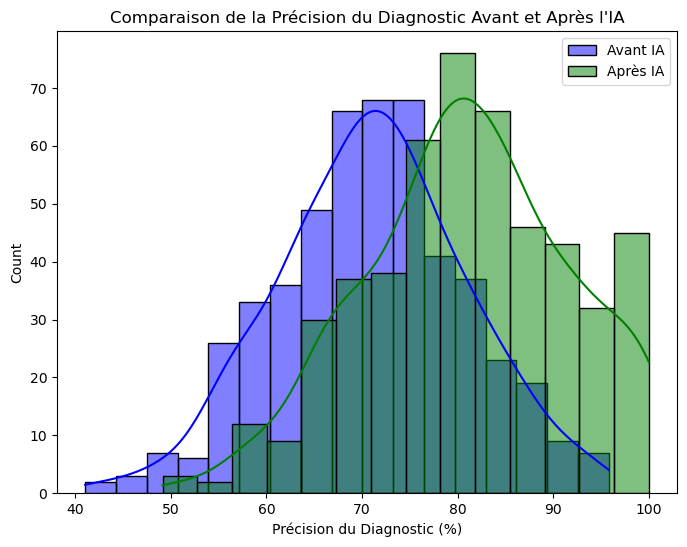

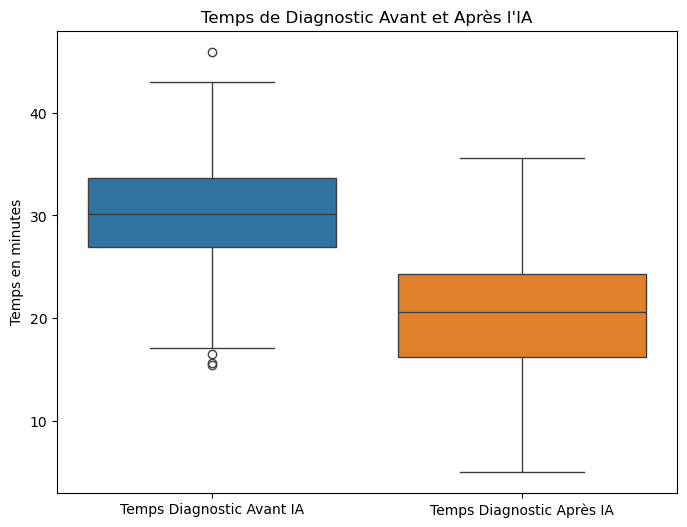

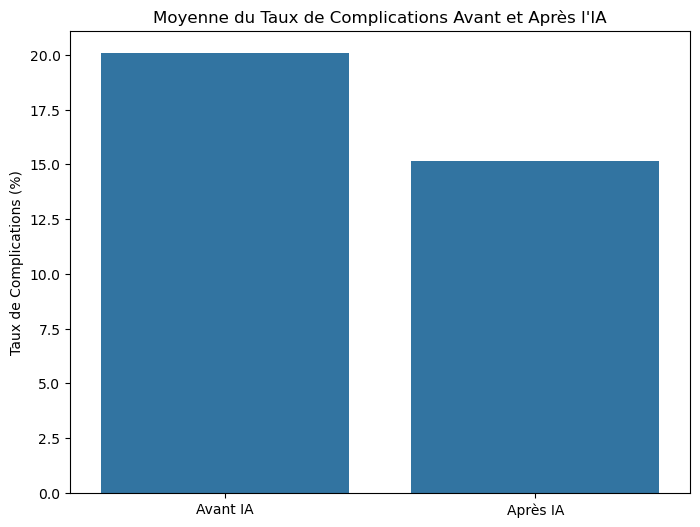

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Comparer la précision du diagnostic avant et après l'IA
plt.figure(figsize=(8, 6))
sns.histplot(df['Précision Avant IA'], color='blue', label='Avant IA', kde=True)
sns.histplot(df['Précision Après IA'], color='green', label='Après IA', kde=True)
plt.xlabel('Précision du Diagnostic (%)')
plt.title('Comparaison de la Précision du Diagnostic Avant et Après l\'IA')
plt.legend()
plt.show()

# Comparer le temps de diagnostic avant et après l'IA
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Temps Diagnostic Avant IA', 'Temps Diagnostic Après IA']])
plt.title('Temps de Diagnostic Avant et Après l\'IA')
plt.ylabel('Temps en minutes')
plt.show()

# Comparer le taux de complications avant et après l'IA
plt.figure(figsize=(8, 6))
sns.barplot(x=['Avant IA', 'Après IA'], 
            y=[df['Complications Avant IA'].mean(), df['Complications Après IA'].mean()])
plt.title('Moyenne du Taux de Complications Avant et Après l\'IA')
plt.ylabel('Taux de Complications (%)')
plt.show()
